In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

# Load the dataset
file_path = r"C:\Users\HP Pavilion\Documents\crop_yield.csv"
df = pd.read_csv(file_path)

# Check dataset structure
print(df.head())

# Ensure data types are correct
df["Area"] = pd.to_numeric(df["Area"], errors="coerce")
df["Annual_Rainfall"] = pd.to_numeric(df["Annual_Rainfall"], errors="coerce")
df["Fertilizer"] = pd.to_numeric(df["Fertilizer"], errors="coerce")
df["Pesticide"] = pd.to_numeric(df["Pesticide"], errors="coerce")
df["Yield"] = pd.to_numeric(df["Yield"], errors="coerce")

# Drop rows with missing values
df.dropna(subset=["Area", "Annual_Rainfall", "Fertilizer", "Pesticide", "Yield"], inplace=True)

# Implement the physical model
def physical_model(area, rainfall, fertilizer, pesticide):
    beta1, beta2, beta3, beta4 = 0.01, 0.05, 0.1, 0.02  # Example coefficients
    return (beta1 * area) + (beta2 * rainfall) + (beta3 * fertilizer) + (beta4 * pesticide)

# Apply the physical model
df["Physical_Model_Yield"] = df.apply(
    lambda row: physical_model(row["Area"], row["Annual_Rainfall"], row["Fertilizer"], row["Pesticide"]),
    axis=1
)

# Calculate residuals for machine learning
df["Residuals"] = df["Yield"] - df["Physical_Model_Yield"]

# Prepare data for machine learning
X = df[["Area", "Annual_Rainfall", "Fertilizer", "Pesticide"]]
y = df["Residuals"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build a neural network model
model = Sequential([
    Dense(64, activation="relu", input_shape=(X_train.shape[1],)),
    Dense(32, activation="relu"),
    Dense(1)  # Output layer for residual prediction
])

# Compile the model
model.compile(optimizer="adam", loss="mse", metrics=["mae"])

# Set up early stopping
early_stopping = EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True)

# Train the model
model.fit(
    X_train, y_train,
    epochs=200,
    batch_size=10,
    validation_split=0.1,
    callbacks=[early_stopping],
    verbose=1
)

# Predict residuals on the test set
y_pred_residuals = model.predict(X_test).reshape(-1)

# Combine physical model predictions and residuals for the final prediction
df["ML_Residuals"] = model.predict(X).reshape(-1)
df["Digital_Twin_Yield"] = df["Physical_Model_Yield"] + df["ML_Residuals"]

# Evaluate the digital twin
mae_physical_model = mean_absolute_error(df["Yield"], df["Physical_Model_Yield"])
mae_digital_twin = mean_absolute_error(df["Yield"], df["Digital_Twin_Yield"])
rmse_digital_twin = np.sqrt(mean_squared_error(df["Yield"], df["Digital_Twin_Yield"]))
r2_digital_twin = r2_score(df["Yield"], df["Digital_Twin_Yield"])

print(f"MAE of Physical Model: {mae_physical_model}")
print(f"MAE of Digital Twin: {mae_digital_twin}")
print(f"RMSE of Digital Twin: {rmse_digital_twin}")
print(f"R2 Score of Digital Twin: {r2_digital_twin}")

# Save results to a new CSV file
output_file_path = r"C:\Users\HP Pavilion\Documents\crop_yield_with_digital_twin.csv"
df.to_csv(output_file_path, index=False)
print(f"Results saved to {output_file_path}")


           Crop       Season     Area  Production  Annual_Rainfall  \
0      Arecanut  Whole Year   73814.0       56708           2051.4   
1     Arhar/Tur  Kharif        6637.0        4685           2051.4   
2   Castor seed  Kharif         796.0          22           2051.4   
3      Coconut   Whole Year   19656.0   126905000           2051.4   
4  Cotton(lint)  Kharif        1739.0         794           2051.4   

   Fertilizer  Pesticide        Yield  
0  7024878.38   22882.34     0.796087  
1   631643.29    2057.47     0.710435  
2    75755.32     246.76     0.238333  
3  1870661.52    6093.36  5238.051739  
4   165500.63     539.09     0.420909  
Epoch 1/200


C:\Users\HP Pavilion\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1418/1418 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 1068167069696.0000 - mae: 156358.3438 - val_loss: 282867367936.0000 - val_mae: 134219.7188
Epoch 2/200
1418/1418 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 1474578743296.0000 - mae: 164963.6094 - val_loss: 101562621952.0000 - val_mae: 80319.0234
Epoch 3/200
1418/1418 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 7106195881984.0000 - mae: 330556.1250 - val_loss: 372911392.0000 - val_mae: 4823.1665
Epoch 4/200
1418/1418 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 10375858176.0000 - mae: 9894.6240 - val_loss: 6309112320.0000 - val_mae: 18848.1035
Epoch 5/200
1418/1418 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 228089020416.0000 - mae: 43559.0000 - val_loss: 110115168256.0000 - val_mae: 83184.8281
Epoch 6/200
1418/1418 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 775484538880.0000 - mae: 84802.5547 - val_loss: 110113169408.0000 - val_mae: 83130.5234
Epoch 7/200
1418/1418 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 62658969600.0000 - mae: 28930.5488 - val_los

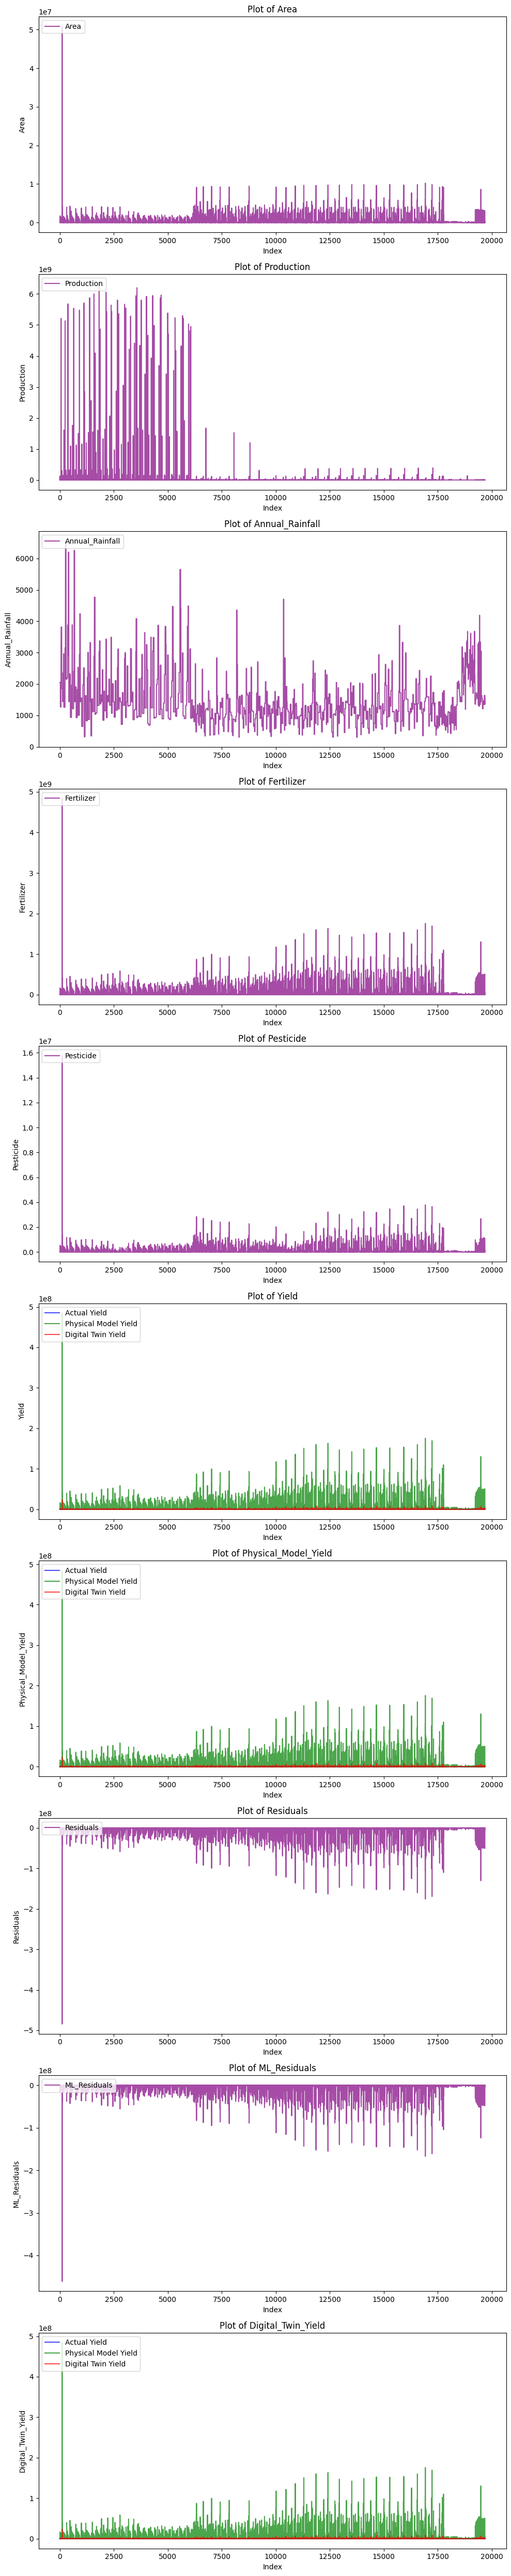

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the saved CSV file
file_path = r"C:\Users\HP Pavilion\Documents\crop_yield_with_digital_twin.csv"
df = pd.read_csv(file_path)

# Select numerical columns for plotting
numerical_columns = df.select_dtypes(include=["float64", "int64"]).columns

# Set up the figure and subplots
num_plots = len(numerical_columns)
fig, axes = plt.subplots(nrows=num_plots, ncols=1, figsize=(10, 5 * num_plots))
axes = axes.flatten() if num_plots > 1 else [axes]

# Iterate through numerical columns and create comparison plots
for i, col in enumerate(numerical_columns):
    if col in ["Yield", "Physical_Model_Yield", "Digital_Twin_Yield"]:
        # Plot comparisons for yield-related columns
        axes[i].plot(df["Yield"], label="Actual Yield", color="blue", alpha=0.7)
        axes[i].plot(df["Physical_Model_Yield"], label="Physical Model Yield", color="green", alpha=0.7)
        axes[i].plot(df["Digital_Twin_Yield"], label="Digital Twin Yield", color="red", alpha=0.7)
    else:
        # Plot other numerical columns
        axes[i].plot(df[col], label=f"{col}", color="purple", alpha=0.7)

    # Add title and legend
    axes[i].set_title(f"Plot of {col}", fontsize=12)
    axes[i].set_xlabel("Index")
    axes[i].set_ylabel(col)
    axes[i].legend(loc="upper left")

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


C:\Users\HP Pavilion\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/200
394/394 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 731101.1875 - mae: 89.6825 - val_loss: 600876.1875 - val_mae: 115.1968
Epoch 2/200
394/394 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 388121.0312 - mae: 90.2616 - val_loss: 480011.4062 - val_mae: 112.2972
Epoch 3/200
394/394 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 332911.5000 - mae: 80.9031 - val_loss: 418954.0312 - val_mae: 101.6042
Epoch 4/200
394/394 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 430137.4688 - mae: 89.1255 - val_loss: 335011.0625 - val_mae: 75.8127
Epoch 5/200
394/394 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 347554.9375 - mae: 83.3077 - val_loss: 247034.8594 - val_mae: 59.4610
Epoch 6/200
394/394 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 311265.5625 - mae: 76.3633 - val_loss: 160697.8594 - val_mae: 50.7993
Epoch 7/200
394/394 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 247506.0156 - mae: 59.2887 - val_loss: 118009.4688 - val_mae: 41.9051
Epoch 8/200
394/394 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 179472.2188 - mae: 

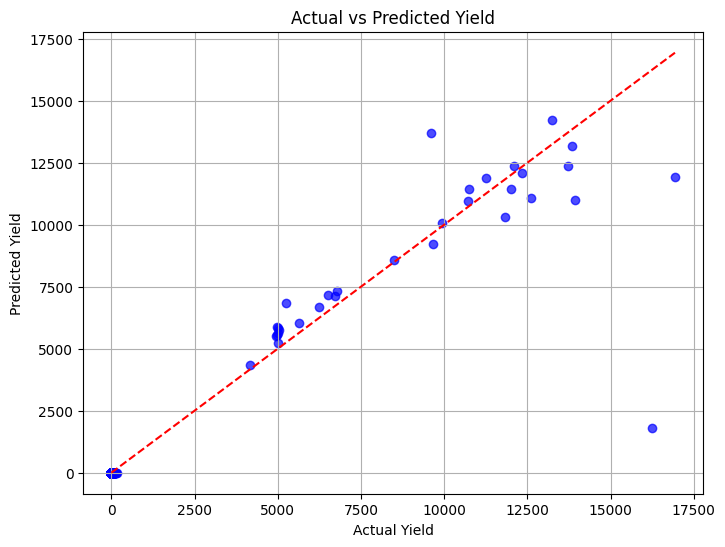

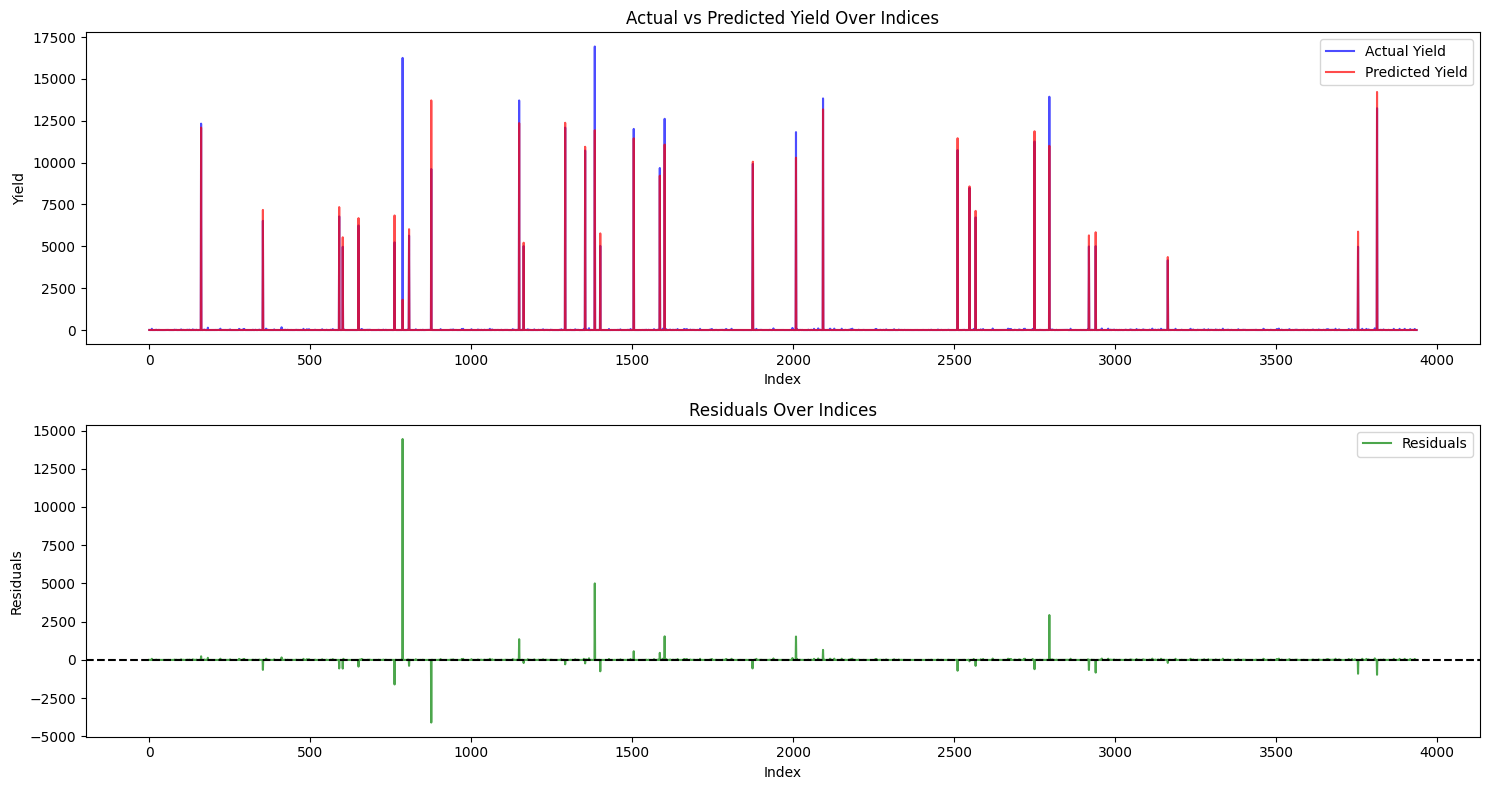

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

# Load dataset
file_path = r"C:\Users\HP Pavilion\Documents\crop_yield_with_digital_twin.csv"
df = pd.read_csv(file_path)

# Perform label encoding for categorical columns if present
label_encoder = LabelEncoder()
categorical_columns = df.select_dtypes(include=["object"]).columns

for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

# Select features and target
X = df.drop(columns=["Yield", "Physical_Model_Yield", "Digital_Twin_Yield"])
y = df["Yield"]

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the neural network
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer for regression
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(X_train_scaled, y_train, 
                    validation_split=0.2, 
                    epochs=200, 
                    batch_size=32, 
                    callbacks=[early_stopping], 
                    verbose=1)

# Evaluate the model
y_pred = model.predict(X_test_scaled)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")

# Plot Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title("Actual vs Predicted Yield")
plt.xlabel("Actual Yield")
plt.ylabel("Predicted Yield")
plt.grid()
plt.show()

# Comparison plots
results_df = pd.DataFrame({
    "Actual_Yield": y_test.values,
    "Predicted_Yield": y_pred.flatten(),
    "Index": range(len(y_test))
})

plt.figure(figsize=(15, 8))

# Plot Actual vs Predicted
plt.subplot(2, 1, 1)
plt.plot(results_df["Index"], results_df["Actual_Yield"], label="Actual Yield", color="blue", alpha=0.7)
plt.plot(results_df["Index"], results_df["Predicted_Yield"], label="Predicted Yield", color="red", alpha=0.7)
plt.title("Actual vs Predicted Yield Over Indices")
plt.xlabel("Index")
plt.ylabel("Yield")
plt.legend()

# Plot residuals
plt.subplot(2, 1, 2)
residuals = results_df["Actual_Yield"] - results_df["Predicted_Yield"]
plt.plot(results_df["Index"], residuals, label="Residuals", color="green", alpha=0.7)
plt.axhline(0, color='black', linestyle='--')
plt.title("Residuals Over Indices")
plt.xlabel("Index")
plt.ylabel("Residuals")
plt.legend()

plt.tight_layout()
plt.show()


In [8]:
print(X_train_scaled.shape)  # Check the number of features


(15751, 9)


Epoch 1/200


C:\Users\HP Pavilion\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


394/394 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 608518.8125 - mae: 79.5876 - val_loss: 571020.6250 - val_mae: 147.1783
Epoch 2/200
394/394 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 356792.9375 - mae: 97.6281 - val_loss: 487843.1875 - val_mae: 94.3437
Epoch 3/200
394/394 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 336918.8125 - mae: 81.1746 - val_loss: 424303.6562 - val_mae: 86.4676
Epoch 4/200
394/394 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 272229.4375 - mae: 67.7816 - val_loss: 313390.7188 - val_mae: 87.7057
Epoch 5/200
394/394 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 348471.9062 - mae: 86.7709 - val_loss: 227117.0625 - val_mae: 61.2977
Epoch 6/200
394/394 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 325192.7188 - mae: 74.9773 - val_loss: 153107.4219 - val_mae: 52.4684
Epoch 7/200
394/394 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 130131.6641 - mae: 50.3972 - val_loss: 122863.4844 - val_mae: 58.9279
Epoch 8/200
394/394 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 220689.8906 - mae: 53.8730 - val_

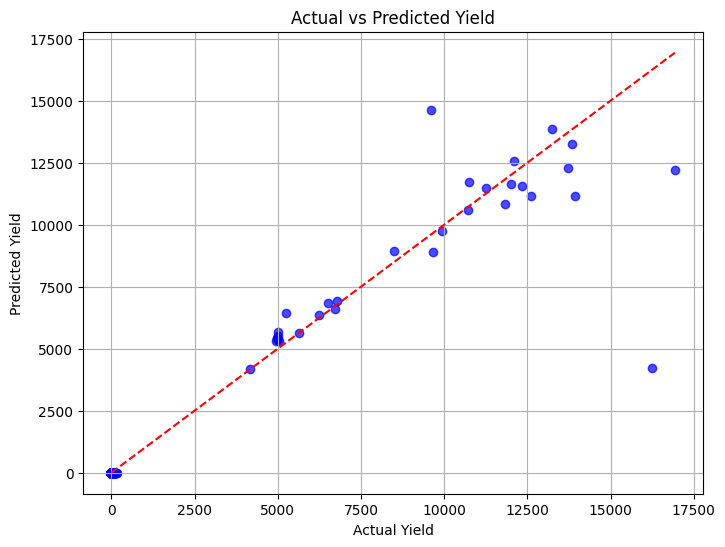

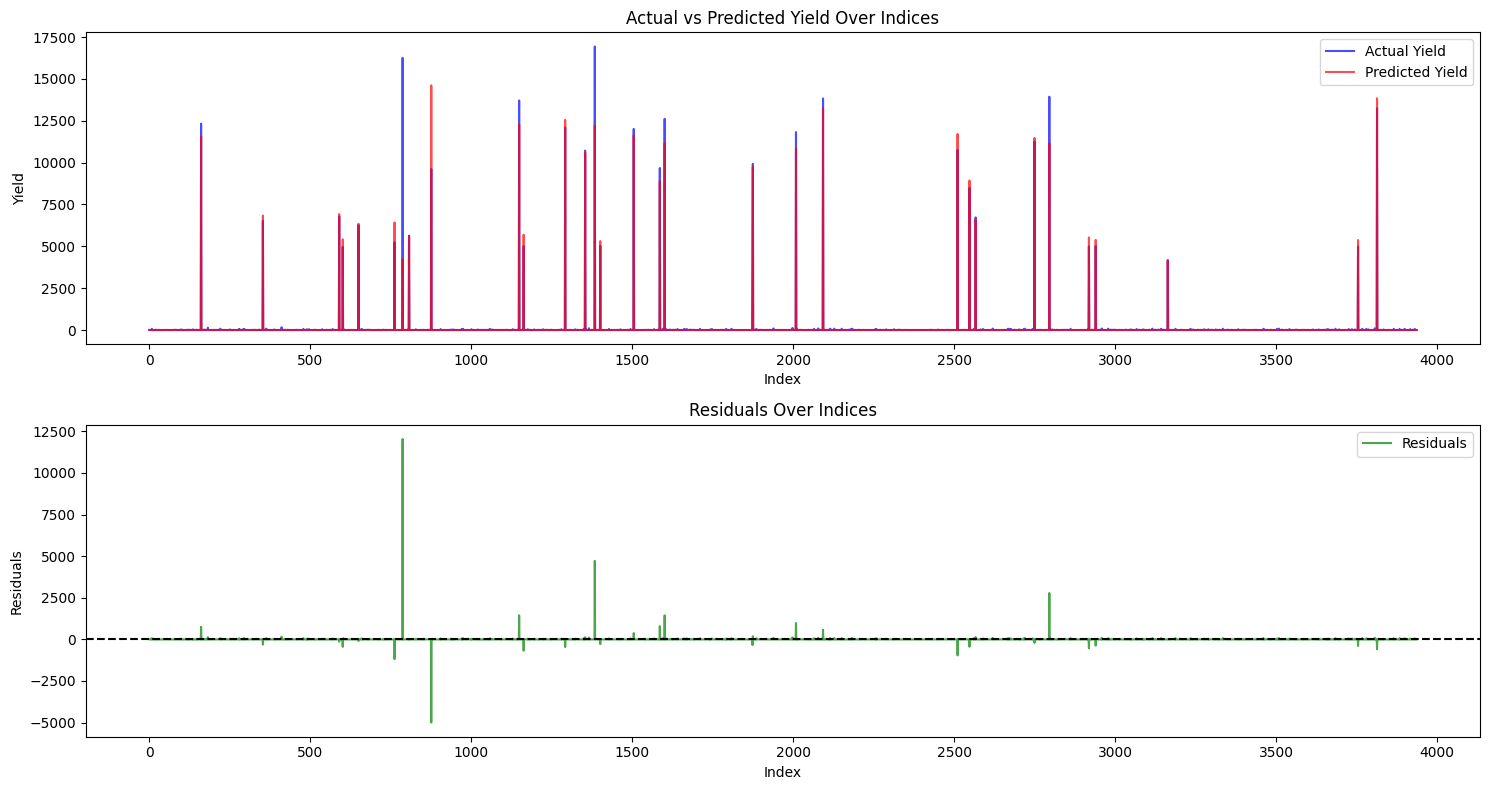

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

# Load dataset
file_path = r"C:\Users\HP Pavilion\Documents\crop_yield_with_digital_twin.csv"
df = pd.read_csv(file_path)

# Perform label encoding for categorical columns if present
label_encoder = LabelEncoder()
categorical_columns = df.select_dtypes(include=["object"]).columns

for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

# Select features and target
X = df.drop(columns=["Yield", "Physical_Model_Yield", "Digital_Twin_Yield"])
y = df["Yield"]

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the neural network
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),  # 9 features as input
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer for regression
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(X_train_scaled, y_train, 
                    validation_split=0.2, 
                    epochs=200, 
                    batch_size=32, 
                    callbacks=[early_stopping], 
                    verbose=1)

# Evaluate the model
y_pred = model.predict(X_test_scaled)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")

# Plot Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title("Actual vs Predicted Yield")
plt.xlabel("Actual Yield")
plt.ylabel("Predicted Yield")
plt.grid()
plt.show()

# Comparison plots
results_df = pd.DataFrame({
    "Actual_Yield": y_test.values,
    "Predicted_Yield": y_pred.flatten(),
    "Index": range(len(y_test))
})

plt.figure(figsize=(15, 8))

# Plot Actual vs Predicted
plt.subplot(2, 1, 1)
plt.plot(results_df["Index"], results_df["Actual_Yield"], label="Actual Yield", color="blue", alpha=0.7)
plt.plot(results_df["Index"], results_df["Predicted_Yield"], label="Predicted Yield", color="red", alpha=0.7)
plt.title("Actual vs Predicted Yield Over Indices")
plt.xlabel("Index")
plt.ylabel("Yield")
plt.legend()

# Plot residuals
plt.subplot(2, 1, 2)
residuals = results_df["Actual_Yield"] - results_df["Predicted_Yield"]
plt.plot(results_df["Index"], residuals, label="Residuals", color="green", alpha=0.7)
plt.axhline(0, color='black', linestyle='--')
plt.title("Residuals Over Indices")
plt.xlabel("Index")
plt.ylabel("Residuals")
plt.legend()

plt.tight_layout()
plt.show()


Epoch 1/200


C:\Users\HP Pavilion\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


394/394 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 795700.1875 - mae: 93.5005 - val_loss: 587553.5000 - val_mae: 104.7279
Epoch 2/200
394/394 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 532283.0000 - mae: 107.2141 - val_loss: 481316.9375 - val_mae: 97.9654
Epoch 3/200
394/394 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 434073.0938 - mae: 93.1409 - val_loss: 400291.0938 - val_mae: 88.4578
Epoch 4/200
394/394 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 395696.9375 - mae: 93.4419 - val_loss: 314548.5625 - val_mae: 104.4550
Epoch 5/200
394/394 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 453455.4688 - mae: 98.3620 - val_loss: 209816.8750 - val_mae: 79.0098
Epoch 6/200
394/394 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 211293.5156 - mae: 67.5051 - val_loss: 143872.9531 - val_mae: 45.0194
Epoch 7/200
394/394 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 169379.2188 - mae: 49.0708 - val_loss: 114520.4609 - val_mae: 57.9968
Epoch 8/200
394/394 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 191638.5000 - mae: 49.8218 - va

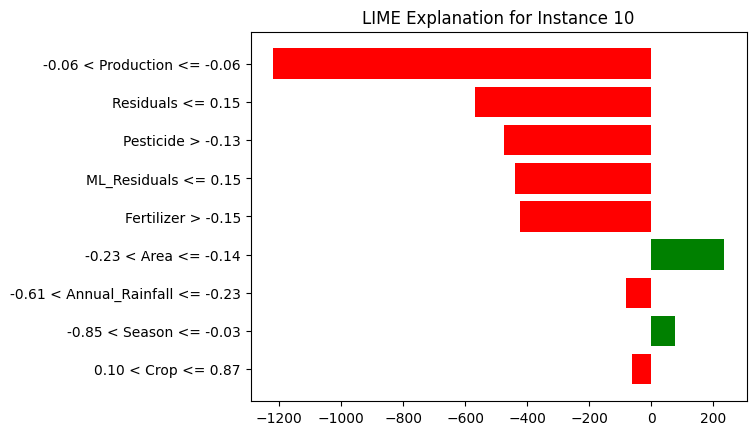

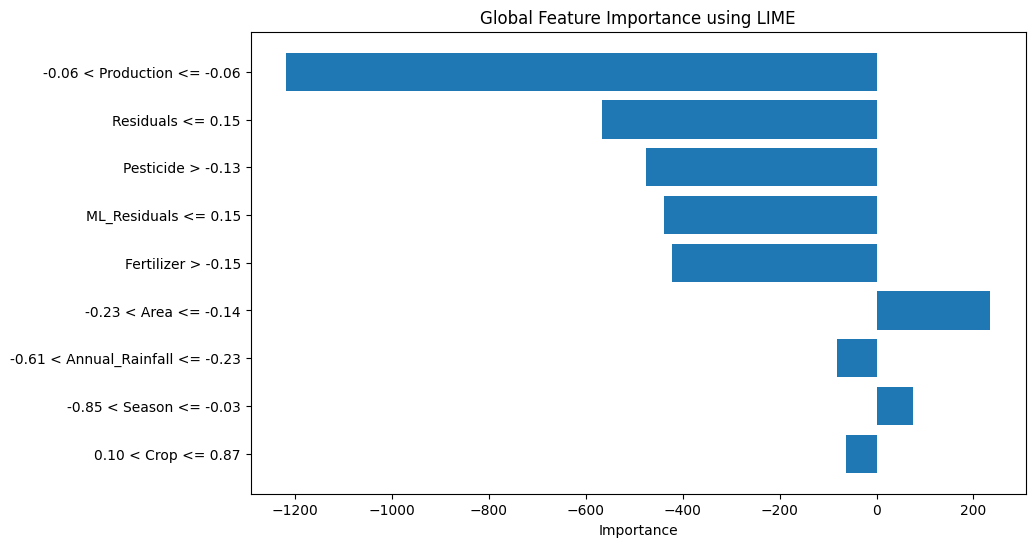

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
import lime
import lime.lime_tabular

# Load dataset
file_path = r"C:\Users\HP Pavilion\Documents\crop_yield_with_digital_twin.csv"
df = pd.read_csv(file_path)

# Perform label encoding for categorical columns if present
label_encoder = LabelEncoder()
categorical_columns = df.select_dtypes(include=["object"]).columns

for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

# Select features and target
X = df.drop(columns=["Yield", "Physical_Model_Yield", "Digital_Twin_Yield"])
y = df["Yield"]

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the neural network
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer for regression
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(X_train_scaled, y_train, 
                    validation_split=0.2, 
                    epochs=200, 
                    batch_size=32, 
                    callbacks=[early_stopping], 
                    verbose=1)

# Evaluate the model
y_pred = model.predict(X_test_scaled)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")

# Initialize the LIME explainer for tabular data
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train_scaled,
    training_labels=y_train,
    mode="regression",
    feature_names=X.columns,
    class_names=["Yield"],  # Single regression output
    discretize_continuous=True
)

# Select a single prediction instance from the test set
i = 10  # You can choose any index from the test set for explanation
exp = explainer.explain_instance(X_test_scaled[i], model.predict)

# Plot the explanation for this instance
exp.show_in_notebook(show_table=True, show_all=False)

# Plot feature importance for the chosen instance
fig = exp.as_pyplot_figure()
plt.title(f"LIME Explanation for Instance {i}")
plt.show()

# Plot global feature importance
# This can be done using the `feature_importances_` attribute from the LIME explainer
feature_importances = exp.as_list()

# Prepare the data for a bar plot
features = [f[0] for f in feature_importances]
importances = [f[1] for f in feature_importances]

# Plot the global feature importance
plt.figure(figsize=(10, 6))
plt.barh(features, importances)
plt.xlabel("Importance")
plt.title("Global Feature Importance using LIME")
plt.gca().invert_yaxis()  # Highest importance on top
plt.show()
